# **ABC Basketball Company Comprehensive Employee Analysis**

## *The csv file contains the details of the different Basketball team members. we have to analyse the data, based on the csv file extracted*.

In [324]:
import pandas as pd
import numpy as np

In [326]:
#  Read the CSV file into a DataFrame
df = pd.read_csv('python_final_project.csv')


In [328]:
# Display the first row of the DataFrame
display(df.head(1))

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0


*In the project document it has informed that the column which contains details of the 'Height' need to be replaced with a new value. Hence we have deleted the column with the heading 'Height'. The data which has popluated in the 'Height'column was the date. The new column 'Height' needs to be created with random number from 150 to 180*

In [331]:

import pandas as pd
import numpy as np

# Load the CSV data into a DataFrame
df = pd.read_csv('python_final_project.csv')

# Check if 'height' column exists
if 'Height' in df.columns:
    # Drop the 'height' column if it exists
    df.drop(columns=['Height'], inplace=True)
else:
    raise ValueError("Column 'Height' not found. Please check the column name.")

# Generate random heights between 150 and 180 for each row
min_height = 150
max_height = 180
df['height'] = np.random.randint(min_height, max_height + 1, size=len(df))

# Check if 'Age' column exists
if 'Age' not in df.columns:
    raise ValueError("Check the column name is correct: 'Age' does not exist.")

# Insert the new 'height' column right next to the 'Age' column
df.insert(df.columns.get_loc('Age') + 1, 'height', df.pop('height'))

# Display the updated DataFrame
display(df.head(3))


,Name,Team,Number,Position,Age,height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,157,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,165,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,161,205,Boston University,NaN


*Keeping a backup copy of our CSV file before making any changes is a great practice. This ensures that we can always revert to the original data
if something goes wrong during data processing or if we need to compare changes later.*

In [333]:
#create a copy of the csv file
df_copy = df.copy()
#Save the copy to a new CSV file
df_copy.to_csv('backup_python_final_project_Before_updating_missing.csv', index=False)


*When handling missing data, it is essential to identify the numeric and categorical fields. This is because the approach to managing missing data varies depending on the type of data.*  

  
*Below is the procedure to identify them:*  
 
*Identify the Numerical columns and display the count of numerical columns with null values*  

*Identify the Categorical columns and display the count of Categorical columns with null values*  

*Display the Df file to show the column which has missing values*


In [336]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

def check_column(column):
    column_type = df[column].dtype
    null_count = df[column].isnull().sum()
    print(f"Column: {column}, Type: {column_type}, Null Values: {null_count}")

# Check numerical columns
print("\nNumerical Columns with Null Values:")
for col in numeric_columns:
    check_column(col)

# Check categorical columns
print("\nCategorical Columns with Null Values:")
for col in categorical_columns:
    check_column(col)

# Display rows where any column values are NaN
df_nulls = df[df.isnull().any(axis=1)]
print("\nRows with Any NaN Values:")

# Display only the rows with null values
#any(axis=1) checks each row to see if any of the elements are True
df_nulls = df[df.isnull().any(axis=1)]
print(df_nulls.head(458).to_string())



Numerical Columns with Null Values:
Column: Number, Type: int64, Null Values: 0
Column: Age, Type: int64, Null Values: 0
Column: height, Type: int32, Null Values: 0
Column: Weight, Type: int64, Null Values: 0
Column: Salary, Type: float64, Null Values: 11

Categorical Columns with Null Values:
Column: Name, Type: object, Null Values: 0
Column: Team, Type: object, Null Values: 0
Column: Position, Type: object, Null Values: 0
Column: College, Type: object, Null Values: 84

Rows with Any NaN Values:
                       Name                    Team  Number Position  Age  height  Weight                College      Salary
2              John Holland          Boston Celtics      30       SG   27     161     205      Boston University         NaN
4             Jonas Jerebko          Boston Celtics       8       PF   29     168     231                    NaN   5000000.0
5              Amir Johnson          Boston Celtics      90       PF   29     178     240                    NaN  12000000

*Procedure to update the numerical column with the mean value*

*Procedure to update the Categorical columns with the Mode*  

*Display the number of records updated in numeric column*

*Display the number of records updated in categorical column*

*Display only the columns which has udated with the updated Values*

*Display the Data frame with the updted values*  

*Save  the updated CSV file*

In [339]:
df_copy = df.copy()
# Identify duplicates
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)
# Create a copy of the original DataFrame to keep track of null positions
df_original = df.copy()
# Fill missing numeric values with the mean of the column
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
# Fill missing categorical values with the mode of the column
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
# Create a mask to identify the updated values
updated_mask = df_original.isnull() & df.notnull()
# Calculate the count of updated fields
numeric_updates_count = updated_mask[numeric_cols].sum().sum()
categorical_updates_count = updated_mask[categorical_cols].sum().sum()
# Display the rows and columns where the null values were updated
updated_df = df.where(updated_mask).dropna(how='all', axis=0).dropna(how='all', axis=1)

print(f"\nTotalnumeric_updates_coun is: {numeric_updates_count}")
print(f"\nTotalcategorical_record_count is:{categorical_updates_count}")
print("\nUpdated values only:")
print(updated_df.to_string())
#create a copy of the csv file
df_copy = df.copy()
#Save the copy to a new CSV file
df_copy.to_csv('backup_python_final_project_After_updating_missing.csv', index=False)

Duplicate rows:
Empty DataFrame
Columns: [Name, Team, Number, Position, Age, height, Weight, College, Salary]
Index: []

Totalnumeric_updates_coun is: 11

Totalcategorical_record_count is:84

Updated values only:
      College        Salary
2         NaN  4.833970e+06
4    Kentucky           NaN
5    Kentucky           NaN
15   Kentucky           NaN
20   Kentucky           NaN
32   Kentucky           NaN
34   Kentucky           NaN
40   Kentucky           NaN
41   Kentucky           NaN
43   Kentucky           NaN
46        NaN  4.833970e+06
61   Kentucky           NaN
62   Kentucky           NaN
68   Kentucky           NaN
72   Kentucky           NaN
74   Kentucky           NaN
76   Kentucky           NaN
84   Kentucky           NaN
90   Kentucky           NaN
102  Kentucky           NaN
109  Kentucky           NaN
112  Kentucky           NaN
118  Kentucky           NaN
124  Kentucky           NaN
132  Kentucky           NaN
138  Kentucky           NaN
140  Kentucky           NaN
155

*Remove the duplicates  from the dataframe as part of the data cleaning process*

*The [suebset] parameter specifies which columns to consider when identifying duplicate rows.
Essentially, it tells pandas to look only at these specified columns to determine if a row is a duplicate. That means the pandas will consider 
one row as duplicate only if the columns mentioned in the  subset parameter values are  same.*

In [209]:

df = pd.DataFrame(df_original)

# Identify duplicates
duplicates = df[df.duplicated()]

print("Duplicate rows:")
print(duplicates)


# Remove duplicates based on Name, Team, Weight, and Salary
df_unique = df.drop_duplicates(subset=["Name", "Team", "Weight", "Salary"])

# Confirm the removal of duplicates by displaying the number of unique records
unique_records_count = len(df_unique)

print(f"Total unique records: {unique_records_count}")

# Optionally, save the unique records to a new file
df_unique.to_csv('Unique_Records.csv', index=False)
#copy the contents of the df_unique to the file df
df = df_unique.copy()

Duplicate rows:
Empty DataFrame
Columns: [Name, Team, Number, Position, Age, height, Weight, College, Salary]
Index: []
Total unique records: 458


In [342]:
#create a copy of the csv file
df_copy = df.copy()
#Save the copy to a new CSV file
df_copy.to_csv('backup_python_final_project_after_updating_missing.csv', index=False)


In [344]:
#print(df.to_string(index=False)) will print the DataFrame without including index making it easier to read
print(df.to_string(index=False))

                    Name                   Team  Number Position  Age  height  Weight               College       Salary
           Avery Bradley         Boston Celtics       0       PG   25     157     180                 Texas 7.730337e+06
             Jae Crowder         Boston Celtics      99       SF   25     165     235             Marquette 6.796117e+06
            John Holland         Boston Celtics      30       SG   27     161     205     Boston University 4.833970e+06
             R.J. Hunter         Boston Celtics      28       SG   22     171     185         Georgia State 1.148640e+06
           Jonas Jerebko         Boston Celtics       8       PF   29     168     231              Kentucky 5.000000e+06
            Amir Johnson         Boston Celtics      90       PF   29     178     240              Kentucky 1.200000e+07
           Jordan Mickey         Boston Celtics      55       PF   21     168     235                   LSU 1.170960e+06
            Kelly Olynyk        

## *1.	Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.* 

In [347]:

# Group by 'Team' and count the number of employees (or rows)
team_distribution = df.groupby('Team').size()

# Convert the result to a Series for better readability
team_distribution = pd.Series(team_distribution)
# print("\nTeam Distribution:")
# print(team_distribution)
total_employees = len(df)
percentage_split = (team_distribution / total_employees) * 100
distribution_df = pd.DataFrame({
    'Team': team_distribution.index,
    'Number of Employees': team_distribution.values,
    'Percentage Split': percentage_split.values})
print(distribution_df)

                      Team  Number of Employees  Percentage Split
0            Atlanta Hawks                   15          3.275109
1           Boston Celtics                   15          3.275109
2            Brooklyn Nets                   15          3.275109
3        Charlotte Hornets                   15          3.275109
4            Chicago Bulls                   15          3.275109
5      Cleveland Cavaliers                   15          3.275109
6         Dallas Mavericks                   15          3.275109
7           Denver Nuggets                   15          3.275109
8          Detroit Pistons                   15          3.275109
9    Golden State Warriors                   15          3.275109
10         Houston Rockets                   15          3.275109
11          Indiana Pacers                   15          3.275109
12    Los Angeles Clippers                   15          3.275109
13      Los Angeles Lakers                   15          3.275109
14       M

In [311]:
df = pd.read_csv('backup_python_final_project_after_updating_missing.csv')

# Calculate the total number of employees for each team, grouping the datafram 'df' by column name 'Team' counts the number of employees
team_totals = df.groupby('Team').size()

# Calculate the total number of employees across all teams
total_employees = team_totals.sum()

# Determine the percentage split for each team
team_percentages = (team_totals / total_employees) * 100

# Print the output
print("Team Totals:\n", team_totals)
print("\nTotal Employees: ", total_employees)
print("\nTeam Percentages:\n", team_percentages)

# Determine the colors for the bars, creating a lost called 'colors'  that contains the colour blue
#and repeat until there are teams in 'team_percentage', here len(team_percentages)=30 so it will create 30 bars with blue
colors = ['blue'] * len(team_percentages)
#To find the largest three values in the team_percentages Series
highest_indices = team_percentages.nlargest(3).index
#team_percentages.index.get_loc(highest_indices[0]) gets the position (index) of the first top team in team_percentages
colors[team_percentages.index.get_loc(highest_indices[0])] = 'red'
colors[team_percentages.index.get_loc(highest_indices[1])] = 'green'
colors[team_percentages.index.get_loc(highest_indices[2])] = 'yellow'



Team Totals:
 Team
Atlanta Hawks             15
Boston Celtics            15
Brooklyn Nets             15
Charlotte Hornets         15
Chicago Bulls             15
Cleveland Cavaliers       15
Dallas Mavericks          15
Denver Nuggets            15
Detroit Pistons           15
Golden State Warriors     15
Houston Rockets           15
Indiana Pacers            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Memphis Grizzlies         18
Miami Heat                15
Milwaukee Bucks           16
Minnesota Timberwolves    14
New Orleans Pelicans      19
New York Knicks           16
Oklahoma City Thunder     15
Orlando Magic             14
Philadelphia 76ers        15
Phoenix Suns              15
Portland Trail Blazers    15
Sacramento Kings          15
San Antonio Spurs         15
Toronto Raptors           15
Utah Jazz                 16
Washington Wizards        15
dtype: int64

Total Employees:  458

Team Percentages:
 Team
Atlanta Hawks             3.275109
Boston Celtics 

*Plotting the percentage split*

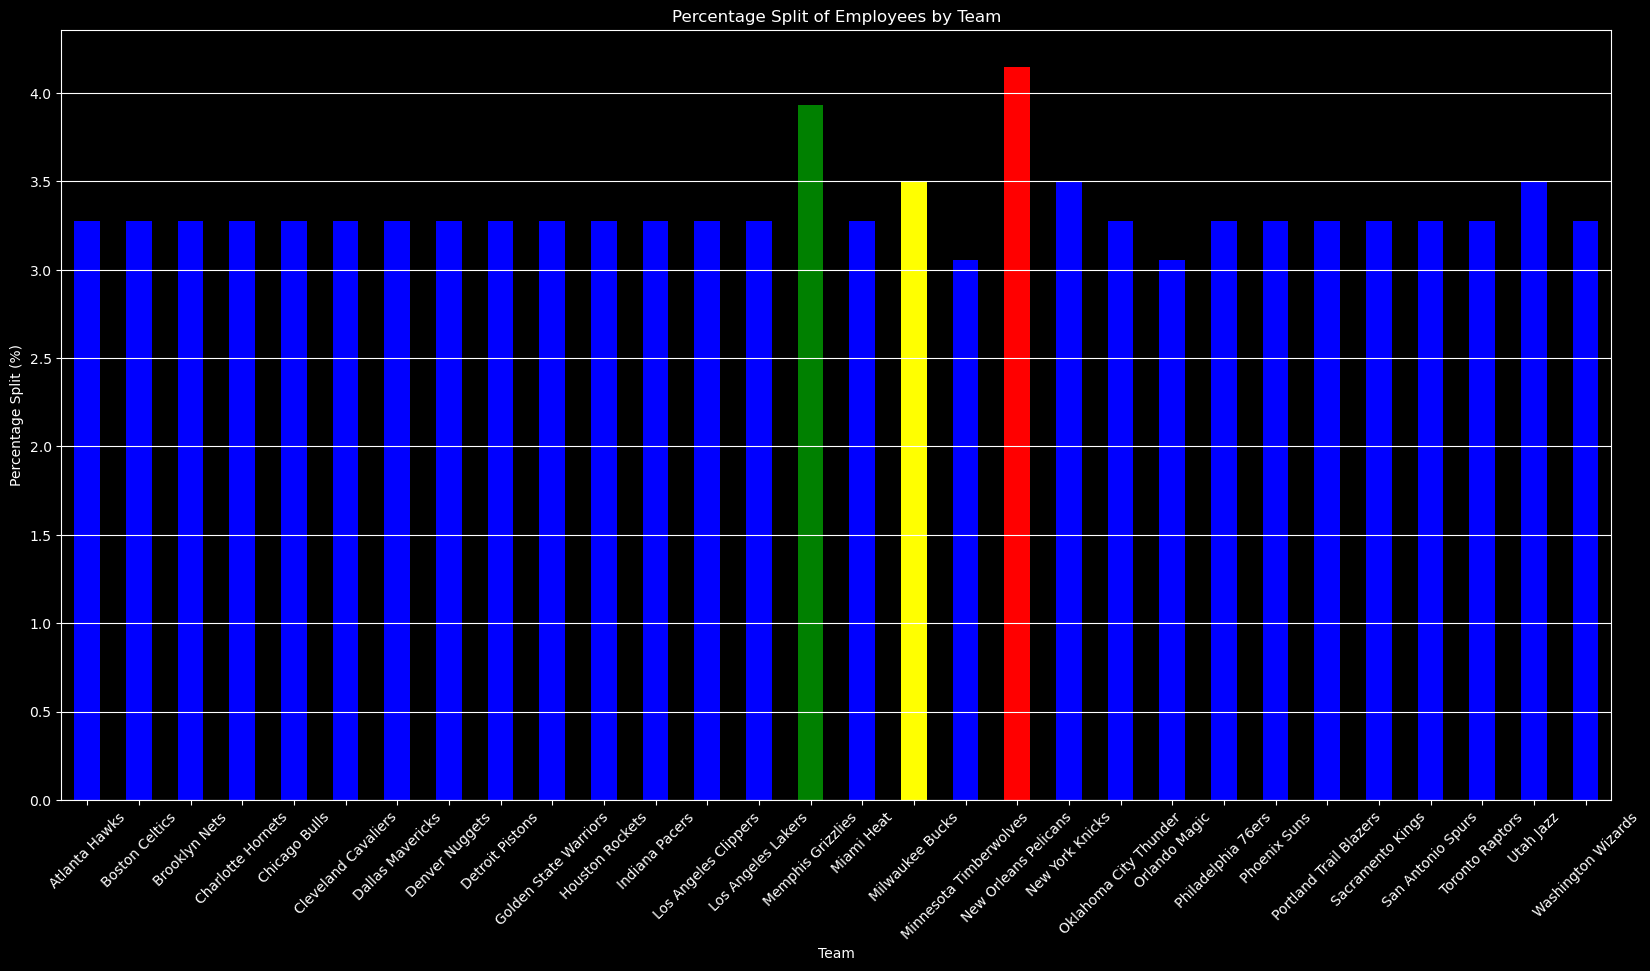

In [350]:
# Plotting the percentage split
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
team_percentages.plot(kind='bar', color=colors)
plt.title('Percentage Split of Employees by Team')
plt.xlabel('Team', loc='center')
plt.ylabel('Percentage Split (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

*Here's the table with each team's percentage split and their difference against the New Orleans Pelicans (the team with the highest percentage):*

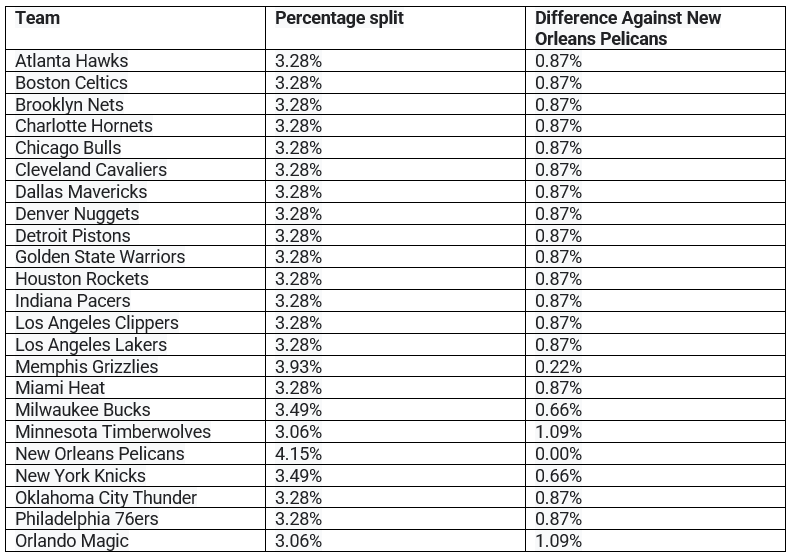
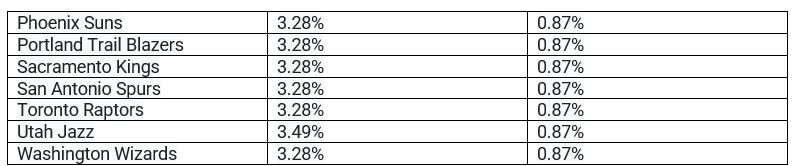

## **Here are a few insights based on the percentage splits and differences for the teams:**


## *1.	Uniformity Among Most Teams: The majority of the teams have an employee percentage split of 3.28%, which shows a fairly even distribution across  the team.*
  
## *2.	New Orleans Pelicans and Memphis Grizzlies: The Pelicans stand out with the highest percentage of 4.15%, followed closely by the Grizzlies at 3.93%. This indicates that these two teams have a slightly larger workforce compared to other teams.*
  
## *3.	Small Differences: The difference between most teams and the New Orleans Pelicans is only around 0.87%. This suggests that while the Pelicans have the highest number, the overall distribution is still relatively close among all teams.*
  
## *4.	Outliers: The teams with the smallest workforce percentage—such as the Minnesota Timberwolves and Orlando Magic with 3.06%—indicate slightly fewer employees compared to the rest of the league, differing by about 1.09% from the Pelicans.*
  
## *5.	Balanced Representation: Overall, the data shows a balanced representation of workforce distribution, ensuring that no single team has a disproportionately large or small share of the total employees.*
  
## *This balanced distribution Shows a structured approach in employee allocation across the teams, potentially aiming for uniformity in operations and management within the league.*
        	




## *2.  	Segregate employees based on their positions within the company*

## *Following  are  some of the different methods to display the  details of the employess based on their postion within the company*

## *The Team mebers are segragate into C, PF,PG, SF & SG*

## *•	Centers (C): 79 players*  

## *•	Power Forwards (PF): 100 players*  

## *•	Point Guards (PG): 92 players*  

## *•	Small Forwards (SF): 85 players*  

## *•	Shooting Guards (SG): 102 players*  



In [354]:
# Read the CSV file
df = pd.read_csv('backup_python_final_project_after_updating_missing.csv')
#Group the team by position to segragate the employess based on the position
grouped = df.groupby('Position')

# Iterate through each group, display the DataFrame as a string without index, and count the rows
for position, group in grouped:
    count = len(group)
    print(f"Position: {position} (Count: {count})")
    print(group.to_string(index=False))
    print("\n" + "-" * 50 + "\n")

Position: C (Count: 79)
               Name                   Team  Number Position  Age  height  Weight              College     Salary
       Kelly Olynyk         Boston Celtics      41        C   25     162     238              Gonzaga  2165160.0
    Jared Sullinger         Boston Celtics       7        C   24     168     260           Ohio State  2569260.0
       Tyler Zeller         Boston Celtics      44        C   26     175     253       North Carolina  2616975.0
        Brook Lopez          Brooklyn Nets      11        C   28     161     275             Stanford 19689000.0
         Henry Sims          Brooklyn Nets      14        C   26     170     248           Georgetown   947276.0
        Robin Lopez        New York Knicks       8        C   28     155     255             Stanford 12650000.0
     Kevin Seraphin        New York Knicks       1        C   26     166     278             Kentucky  2814000.0
        Joel Embiid     Philadelphia 76ers      21        C   22     169

*Bar Chart representation of the segragated team members within the Company*

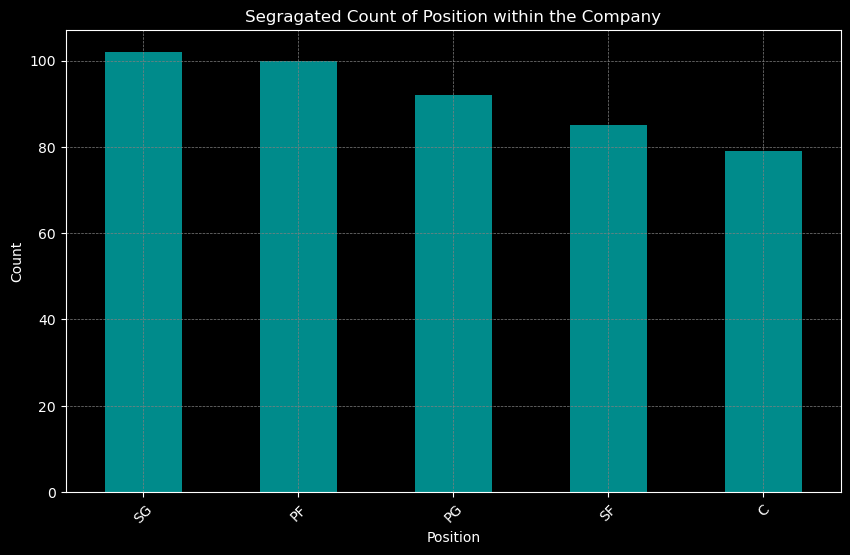

In [219]:
import matplotlib.pyplot as plt

# Count the occurrences of each 'Position'
position_counts = df['Position'].value_counts()

# Set the dark theme for the plot
plt.style.use('dark_background')

# Plotting the data
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='darkcyan')

# Adding title and labels
plt.title('Segragated Count of Position within the Company', color='white')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

*Position wise number of team members within the Company with the Count in each position*

In [221]:
# # Read the CSV file into a DataFrame
# df = pd.read_csv('backup_python_final_project_after_updating_missing.csv')

# Group the data by position and calculate the count of employees in each position
position_Totals = df['Position'].value_counts()

print("\nPosition Totals:", position_Totals)

print("\nTotal Employees: ", total_employees)




Position Totals: Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

Total Employees:  458


*Representation of Position wise number of team members within the Company , using the Pie Chart*


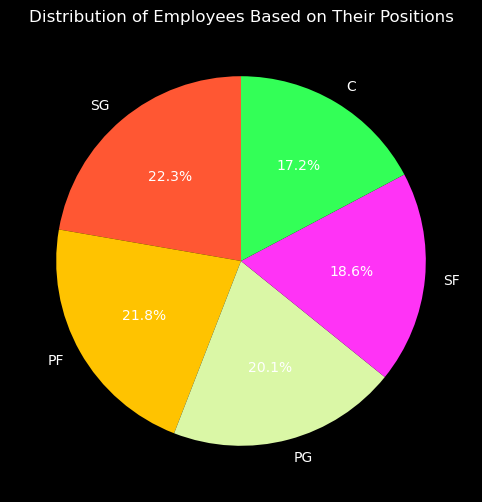

In [356]:

plt.figure(figsize=(10, 6))
position_Totals.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF5733', '#FFC300', '#DAF7A6', '#FF33F6', '#33FF57'])
plt.title('Distribution of Employees Based on Their Positions')
plt.ylabel('')
plt.show()

*Segregated list of Employees based on Position in each Team*

In [359]:
#To find the individual team distribution with the postion

# Group by teams and positions, then count the number of employees in each group
#unstack(fill_value=0) method converts the grouped data into a table where missing values are filled with 0
position_counts = df.groupby(['Team', 'Position']).size().unstack(fill_value=0)

# Display the result
print(position_counts)

Position                C  PF  PG  SF  SG
Team                                     
Atlanta Hawks           3   4   2   2   4
Boston Celtics          3   3   4   1   4
Brooklyn Nets           2   4   3   0   6
Charlotte Hornets       3   3   3   1   5
Chicago Bulls           2   5   2   2   4
Cleveland Cavaliers     3   2   3   2   5
Dallas Mavericks        3   4   4   2   2
Denver Nuggets          3   2   3   3   4
Detroit Pistons         3   2   4   4   2
Golden State Warriors   3   2   2   5   3
Houston Rockets         2   4   2   3   4
Indiana Pacers          2   4   4   3   2
Los Angeles Clippers    2   3   3   4   3
Los Angeles Lakers      3   4   3   4   1
Memphis Grizzlies       1   6   5   3   3
Miami Heat              1   4   2   5   3
Milwaukee Bucks         2   3   4   3   4
Minnesota Timberwolves  3   4   3   3   1
New Orleans Pelicans    3   3   4   4   5
New York Knicks         2   4   2   4   4
Oklahoma City Thunder   3   3   2   3   4
Orlando Magic           2   4   4 

# *2.        Segregation of Employees Based on Position in Each Team , graphical representation*

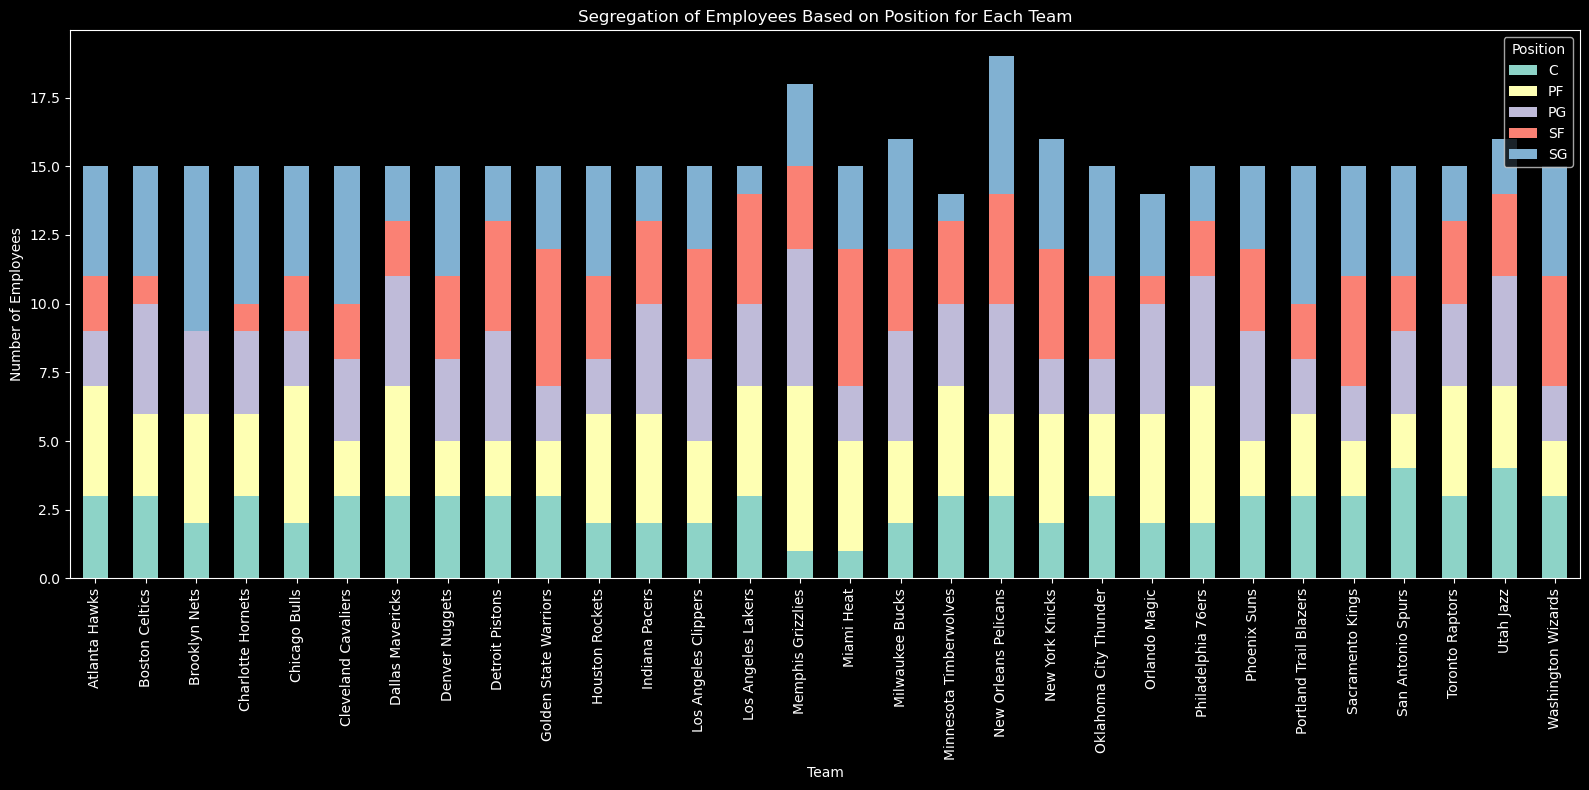

In [362]:
# Plotting
position_counts.plot(kind='bar', stacked=True, figsize=(16, 8))

# Adding labels and title
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.title('Segregation of Employees Based on Position for Each Team')
plt.legend(title='Position')

# Display the plot
plt.tight_layout()
plt.show()


## *Key findings and Insights based on the segragated count of employees with their position in the team*

### *Position Distribution:*

 *•	Shooting Guards (SG): 102 players*

 *•	Power Forwards (PF): 100 players*

 *•	Point Guards (PG): 92 playerse* 

 *•	Small Forwards (SF): 85 players*

 *•	Centers (C): 79 players*

### *Shooting Guards (SG):*
    
 *•	Highest number of players, indicating a wide focus on scoring and defense.*

 *•	Teams like the Brooklyn Nets stand out with a higher number of shooting guards (6), suggesting an emphasis on backcourt rotation.*


### *Power Forwards (PF):*
    
 *•	The second most common position, showing the ability of adaptability of the  forward players who can contribute on both offense and defense.*

*•	Memphis Grizzlies lead with 6 power forwards, suggesting a strong focus on this position Point Guards (PG)*

 *•	Essential for playmaking and ball handling, with a significant number of players across teams.*

 *•	Memphis Grizzlies again lead with 5 point guards, highlighting their strategy around strong guard play.&*

### *Small Forwards (SF):*
     
 *•	Fewer in number, but crucial for versatility and flexibility in both offensive and defensive plays.*

 *•	Golden State Warriors have the highest number of small forwards (5), emphasizing versatility.*

### *Centers (C):*

 *•	Least represented position, indicating a potential shift towards small ball lineups and positionless basketball.*

 *•	Teams like San Antonio Spurs and Utah Jazz have the highest number of centers (4), potentially focusing on traditional big men roles.*

### *Player Distribution Insights:*

 *Teams with 15 Players:*  

 *•	The majority of teams have 15 players, which is the standard roster size. This includes teams like the Atlanta Hawks, Boston Celtics, Brooklyn
    Nets, and others.*
    
 *Teams with More Than 15 Players:*
    
 *•	Memphis Grizzlies: 18 players*

 *•	New Orleans Pelicans: 19 players*

 *•	Milwaukee Bucks: 16 players*

 *•	New York Knicks: 16 players*

 *•	Utah Jazz: 16 players*

 *These teams have larger rosters, potentially indicating a strategy that involves greater flexibility. The New Orleans Pelicans have the largest roster with 19 players, suggesting a strong emphasis on having a variety of options and possibly dealing with injuries or strategic rotations.*
    
 *Teams with Fewer Than 15 Players:*

 *•	Minnesota Timberwolves: 14 players*

 *•	Orlando Magic: 14 players*

 *These teams have smaller rosters, which might indicate a focus on a more tight-knit, core group of players, or it could be due to attrition, injuries, or other roster changes.*


*Following are some of the different methods to display the details of the employess based on their postion and age group*

# *3.	Identify the predominant age group among employees*

In [371]:
# Read the CSV file into a DataFrame
# df = pd.read_csv('backup_python_final_project_after_updating_missing.csv')

# Define age groups
bins = [18, 25, 35, 45, 55, 65, 100]
# Define age groups
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create the 'Age Group' column
#right=False,An interval [18, 25) means it includes 18 but excludes 25. So, ages 18 to 24 will fall in this bin.
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#Calculate the count of employees by age group,the value_counts() function counts the occurrences of each age group.
#By default, sort_index() sorts the DataFrame in ascending order.
age_group_counts = df['Age Group'].value_counts().sort_index()

#The idxmax() function returns the index of the maximum value in the Series, which corresponds to the age group with the highest count.
predominant_age_group = age_group_counts.idxmax()

print("\nThe predominant age group among employees is:\n", predominant_age_group)




The predominant age group among employees is:
 25-34


*Bar chart to show the count of employess in each age group*

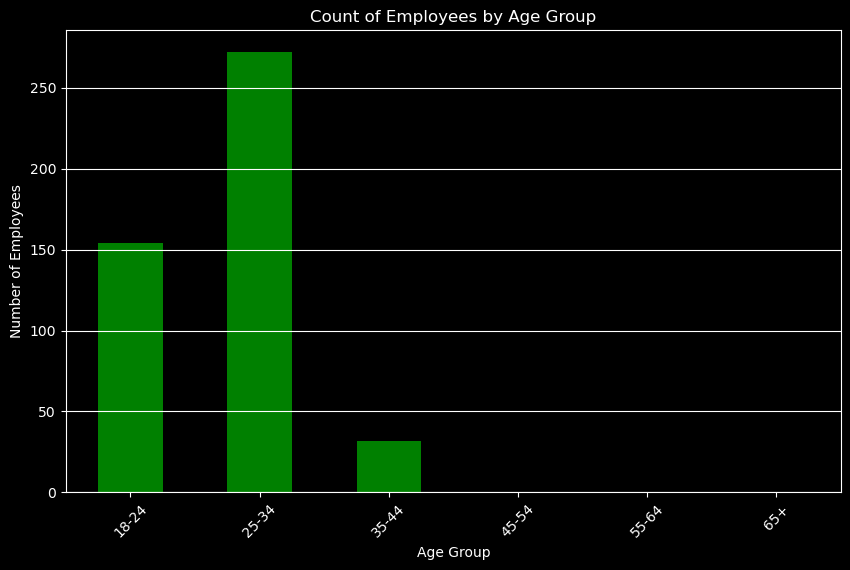

In [368]:
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='green')
plt.title('Count of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

*The predominat age group based on the position*

In [374]:

# Create an 'Age Group' column (assuming you have an 'Age' column in your DataFrame)--
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# Calculate the count of employees by position and age group
Position_age_group_counts = df.groupby(['Position', 'Age Group'], observed=True).size().unstack()

# Show the output
print("\nThe predominant age group by Position among employees is:\n", Position_age_group_counts)




The predominant age group by Position among employees is:
 Age Group  18-24  25-34  35-44
Position                      
C             26     50      3
PF            41     53      6
PG            41     48      3
SF            39     40      6
SG            53     44      5


*Bar chart to represent the predominant age group by Position*

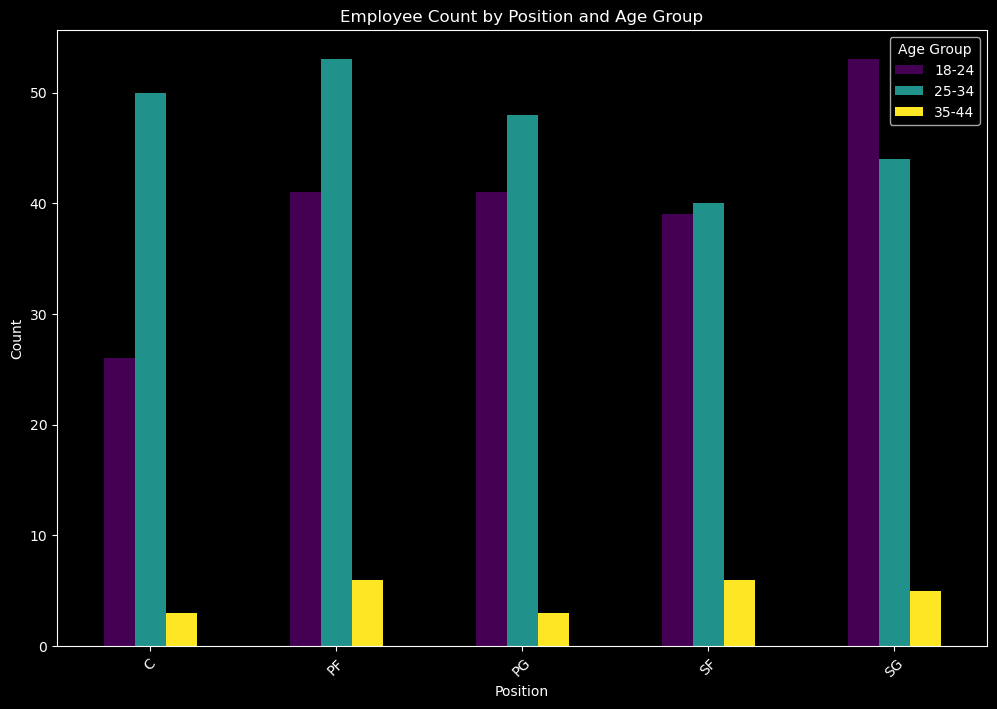

In [378]:
# Plotting the employee count by position and age group
Position_age_group_counts.plot(kind='bar', stacked=False, figsize=(12, 8), cmap='viridis')
plt.title('Employee Count by Position and Age Group')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


*Display the details of each team with Position, Age group, Count of employees falls under each age group*

In [380]:
# Define age groups
bins = [18, 25, 35, 45, 55, 65, 100]
# Define age groups
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create the 'Age Group' column
#right=False,An interval [18, 25) means it includes 18 but excludes 25. So, ages 18 to 24 will fall in this bin.
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# # Calculate the count of employees by department and age group
dept_age_group_counts = df.groupby(['Position', 'Age Group','Team'],observed=True).size().unstack()

 
# Calculate the count of employees by position, age group, and team
Position_Age_Team_group_counts = df.groupby(['Position', 'Age Group', 'Team'], observed=True).size().unstack()

print("\nThe Team members count  by Position,Age Group & Team is:\n", Position_Age_Team_group_counts)





The Team members count  by Position,Age Group & Team is:
 Team                Atlanta Hawks  Boston Celtics  Brooklyn Nets  \
Position Age Group                                                 
C        18-24                1.0             1.0            NaN   
         25-34                2.0             2.0            2.0   
         35-44                NaN             NaN            NaN   
PF       18-24                1.0             1.0            1.0   
         25-34                3.0             2.0            3.0   
         35-44                NaN             NaN            NaN   
PG       18-24                1.0             2.0            1.0   
         25-34                1.0             2.0            2.0   
         35-44                NaN             NaN            NaN   
SF       18-24                NaN             NaN            NaN   
         25-34                2.0             1.0            NaN   
         35-44                NaN             NaN        

*Graphical representation of the team which fall under different age group and Position*

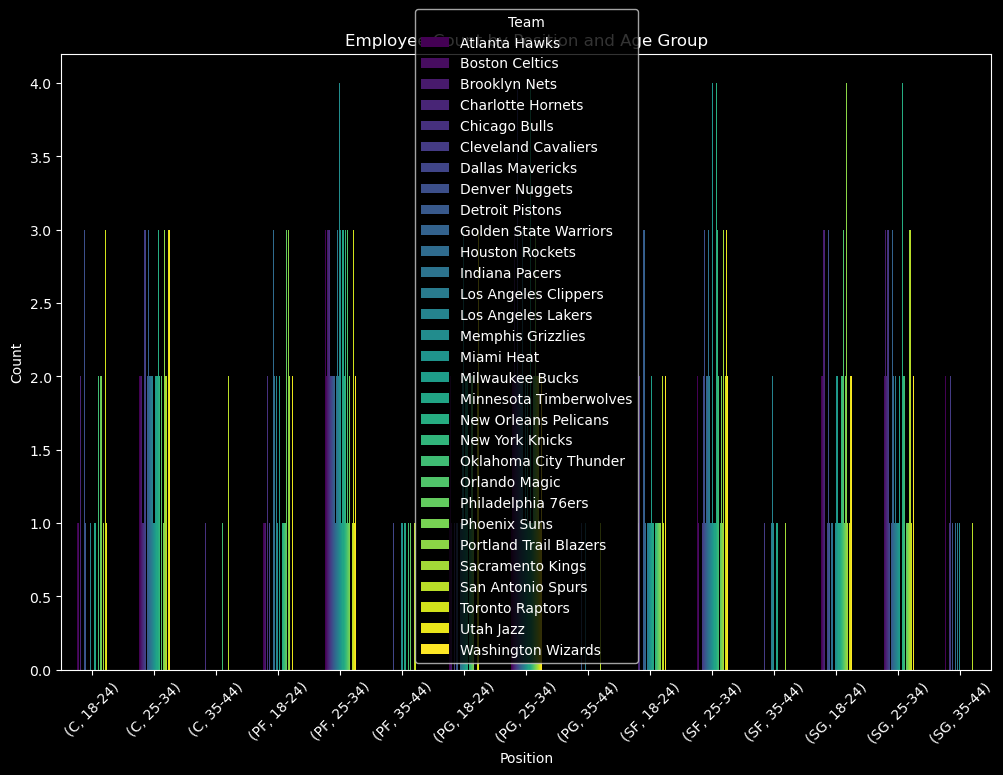

In [241]:
# Plotting the employee count by department and age group
dept_age_group_counts.plot(kind='bar', stacked=False, figsize=(12, 8), cmap='viridis')
plt.title('Employee Count by Position and Age Group')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### *Insights:*
*1.	Centers (C):*  
*o	The predominant age group for Centers is 25-34 with 54 individuals. This suggests that this position tends to attract more experienced players in their prime years.*  
*2.	Power Forwards (PF):*  
*o	The predominant age group for Power Forwards is 25-34 with 62 individuals. This is consistent with the trend seen for Centers, indicating that this position also benefits from players in their peak physical condition and experience.*  
*3.	Point Guards (PG):*
*o	The predominant age group for Point Guards is 25-34 with 58 individuals. Point Guards are typically the playmakers on the team, and having more experienced players in this role can be crucial for game strategy.*  
*4.	Small Forwards (SF):* 
*o	The predominant age group for Small Forwards is 25-34 with 50 individuals. This position often requires versatility, and players in this age group are likely to have the necessary skills and physical fitness.*    
*5.	Shooting Guards (SG):*
*o	The predominant age group for Shooting Guards is 25-34 with 48 individuals. Shooting Guards are key scorers on the team, and having players in their prime years can enhance the team's offensive capabilities.*
### *Overall Insights:*  
*•	The 25-34 age group is dominant across all positions, indicating that this age range is critical for the team's performance and success.*  
*•	Experience and Physical Prime: Players in the 25-34 age group are generally in their physical prime and have significant experience, making them valuable assets to the team.*  
*•	Consistency Across Positions: The consistency of the 25-34 age group being predominant across all positions suggests that this is a key age range for achieving peak performance in basketball.*  

### *Actionable Strategies:*  

*•	Retention and Development: Focus on retaining players in the 25-34 age group by providing career development opportunities, advanced training, and competitive compensation.*    
*•	Injury Prevention: Implement comprehensive injury prevention and management programs to ensure that players in this age group remain in peak condition.*  
*•	Succession Planning: Prepare younger players (18-24 age group) to eventually take over key roles by providing mentorship and development programs.*  



## *4.	Discover which team and position have the highest salary expenditure.*

In [383]:

df = pd.read_csv('backup_python_final_project_after_updating_missing.csv')
# Calculate the total salary expenditure for each team and position
salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()


# Identify the team and position with the highest salary expenditure
max_salary_expenditure = salary_expenditure.loc[salary_expenditure['Salary'].idxmax()]

# Sort the DataFrame by Salary in descending order
df_sorted = df.sort_values(by='Salary', ascending=False)

# Extract the second-highest salary person's information
second_highest_salary_person = df_sorted.iloc[1]

highest_salary_person = df.loc[df['Salary'].idxmax()]

# Display the result
team_with_max_expenditure = max_salary_expenditure['Team']
position_with_max_expenditure = max_salary_expenditure['Position']
highest_salary_expenditure = max_salary_expenditure['Salary']
highest_salary_person = df.loc[df['Salary'].idxmax()]
name = highest_salary_person['Name']
team = highest_salary_person['Team']
height = highest_salary_person['height']
weight = highest_salary_person['Weight']
salary = highest_salary_person['Salary']

print(f"The team with the highest salary expenditure is: {team_with_max_expenditure}")
print(f"The position with the highest salary expenditure is: {position_with_max_expenditure}")
print(f"The highest salary expenditure amount is: {highest_salary_expenditure}")
print(f"\nThe person with the highest salary is: {name}")
print(f"Team: {team}")
print(f"Salary: {salary}")
print(f"Height: {height}")
print(f"Weight: {weight}")


# Remove duplicate salaries to ensure unique salary values
unique_salaries = df.drop_duplicates(subset='Salary')

# Sort the DataFrame by Salary in descending order
salary_expenditure = salary_expenditure.sort_values(by='Salary', ascending=False)
# Get the first 5 different teams and positions with the highest salary expenditure
top_5_teams_positions = salary_expenditure.drop_duplicates(subset='Team').head(5)

# Print the details
print("\nFirst 5 Different Teams and Positions with the Highest Salary Expenditure:\n")
print(top_5_teams_positions.to_string(index=False))

# Sort the DataFrame by Salary in descending order
sorted_df = unique_salaries.sort_values(by='Salary', ascending=False)

# Display the first 5 teams with the highest salary expenditures
top_5_teams = salary_expenditure.head(5)


# Extract the desired information
name = second_highest_salary_person['Name']
team = second_highest_salary_person['Team']
salary = second_highest_salary_person['Salary']
height = second_highest_salary_person['height']
weight = second_highest_salary_person['Weight']

# Display the result
print(f"\nThe person with the second highest salary is: {name}")
print(f"Team: {team}")
print(f"Salary: {salary}")
print(f"Height: {height}")
print(f"Weight: {weight}")



The team with the highest salary expenditure is: Los Angeles Lakers
The position with the highest salary expenditure is: SF
The highest salary expenditure amount is: 31866445.0

The person with the highest salary is: Kobe Bryant
Team: Los Angeles Lakers
Salary: 25000000.0
Height: 162
Weight: 212

First 5 Different Teams and Positions with the Highest Salary Expenditure:

              Team Position     Salary
Los Angeles Lakers       SF 31866445.0
        Miami Heat       PF 31538671.0
   Houston Rockets       SG 28122883.0
      Phoenix Suns       PG 28002998.0
    Denver Nuggets       SF 27982771.0

The person with the second highest salary is: LeBron James
Team: Cleveland Cavaliers
Salary: 22970500.0
Height: 170
Weight: 250


*Display the details of the salary expenditure by Team and  position*

In [246]:


# Calculating the total salary expenditure for each team, position-wise
team_position_salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

# Renaming columns for clarity
team_position_salary_expenditure.columns = ['Team', 'Position', 'Total Salary Expenditure']

# Calculating the total salary expenditure for each team
total_team_salary_expenditure = df.groupby('Team')['Salary'].sum().reset_index()

# Renaming columns for clarity
total_team_salary_expenditure.columns = ['Team', 'Total Salary Expenditure']

# Printing the results
print("Total Salary Expenditure by Team and Position:\n")
# print(team_position_salary_expenditure)
print(team_position_salary_expenditure.to_string(index=False))
print("\nTotal Salary Expenditure by Team:\n")
# print(total_team_salary_expenditure)
print(total_team_salary_expenditure.to_string(index=False))



Total Salary Expenditure by Team and Position:

                  Team Position  Total Salary Expenditure
         Atlanta Hawks        C                22756250.0
         Atlanta Hawks       PF                23952268.0
         Atlanta Hawks       PG                 9763400.0
         Atlanta Hawks       SF                 6000000.0
         Atlanta Hawks       SG                10431032.0
        Boston Celtics        C                 7351395.0
        Boston Celtics       PF                18170960.0
        Boston Celtics       PG                19898606.0
        Boston Celtics       SF                 6796117.0
        Boston Celtics       SG                 6323990.0
         Brooklyn Nets        C                20636276.0
         Brooklyn Nets       PF                14304819.0
         Brooklyn Nets       PG                 8747276.0
         Brooklyn Nets       SG                 8840104.0
     Charlotte Hornets        C                20316720.0
     Charlotte Hornets  

*Plotting the total salary expenditure for each team and position using a stacked bar plot*

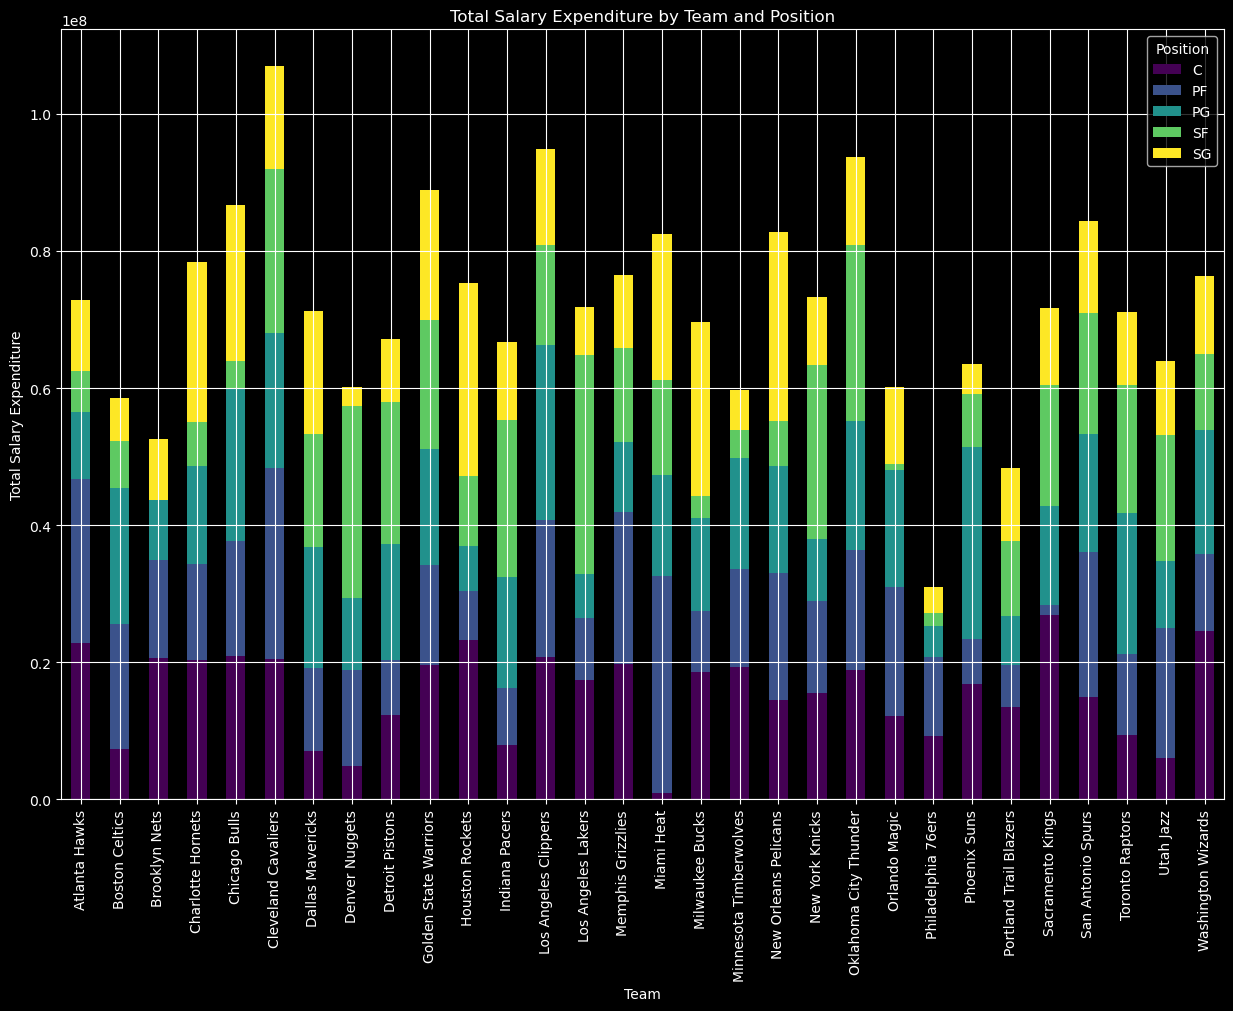

In [388]:

# Plotting the total salary expenditure for each team and position using a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title('Total Salary Expenditure by Team and Position')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.grid(True)
plt.legend(title='Position')
plt.show()


*Graphical representation of the salary expenditure of the team by position*

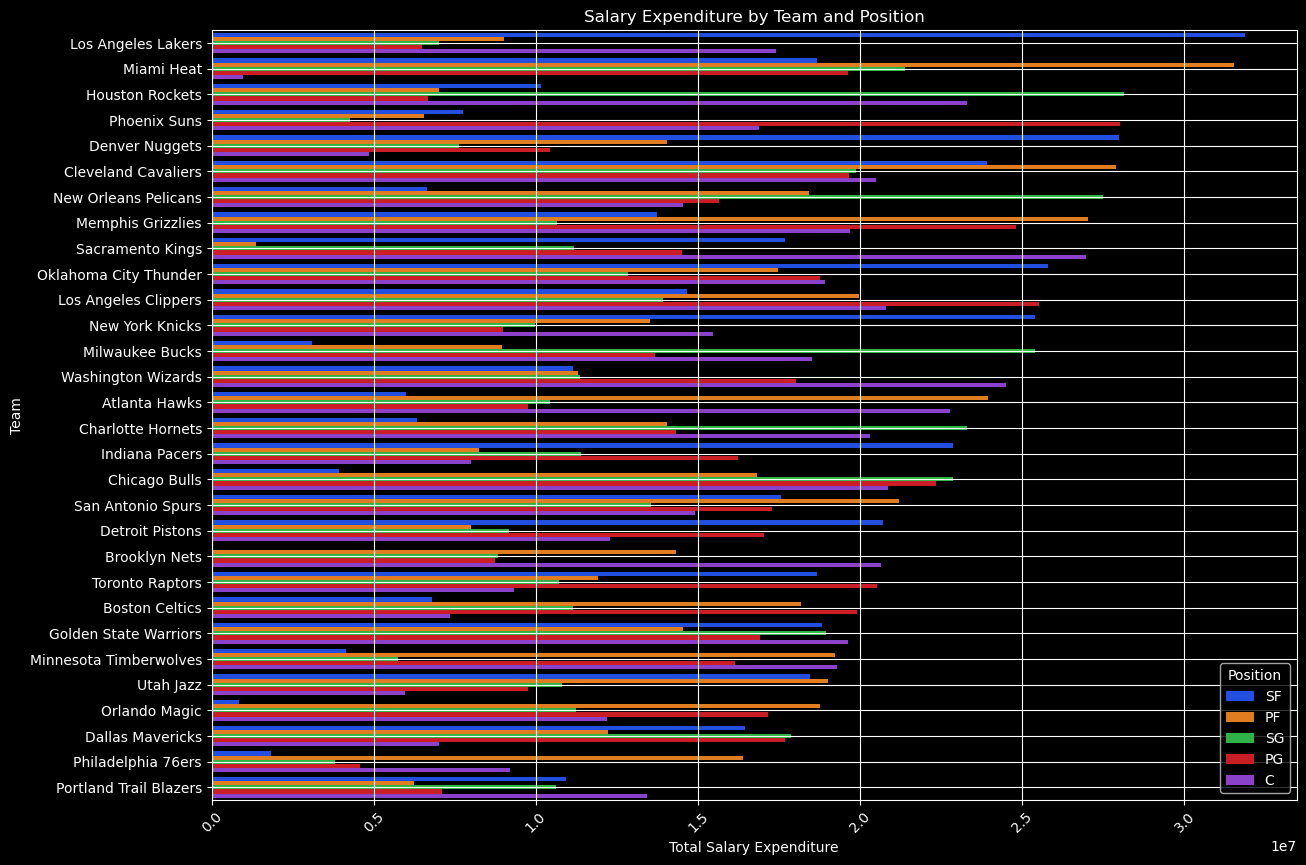

In [394]:
import seaborn as sns
# Plotting the salary expenditure by team and position
plt.figure(figsize=(14, 10))
sns.barplot(x='Salary', y='Team', hue='Position', data=salary_expenditure, palette='bright')
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Total Salary Expenditure')
plt.ylabel('Team')
plt.xticks(rotation=45)
plt.legend(title='Position')
plt.grid(True)
plt.show()



*Scatter Plot diagram of the salary distribution on each age group*

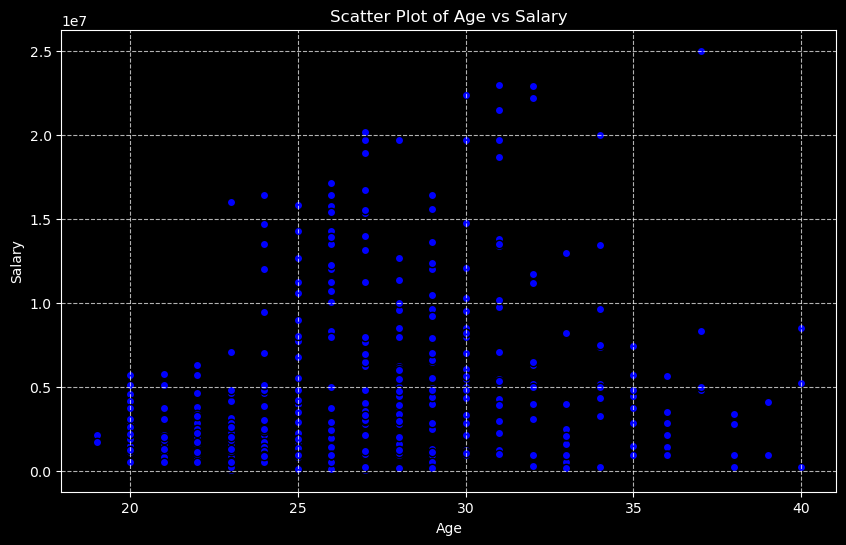

In [399]:
# Plotting the scatter plot of Age vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], color='blue', edgecolor='black')
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

*Salary of the entire employees sort by Salary,Team in the descending order*

In [402]:
#Sort the DataFrame by 'Salary' and 'Team' columns in aescending order
sorted_df = unique_salaries.sort_values(by=['Salary', 'Team'], ascending=False)


# Print the entire sorted DataFrame
print(sorted_df.to_string())

                         Name                    Team  Number Position  Age  height  Weight               College        Salary
109               Kobe Bryant      Los Angeles Lakers      24       SF   37     162     212              Kentucky  2.500000e+07
169              LeBron James     Cleveland Cavaliers      23       SF   31     170     250              Kentucky  2.297050e+07
33            Carmelo Anthony         New York Knicks       7       SF   32     168     240              Syracuse  2.287500e+07
251             Dwight Howard         Houston Rockets      12        C   30     152     265              Kentucky  2.235936e+07
339                Chris Bosh              Miami Heat       1       PF   32     161     235          Georgia Tech  2.219273e+07
100                Chris Paul    Los Angeles Clippers       3       PG   31     159     175           Wake Forest  2.146870e+07
414              Kevin Durant   Oklahoma City Thunder      35       SF   27     156     240             

*Team Wise Salary Expenditure*

In [405]:

# Calculating the total salary expenditure for each team
total_salary_expenditure = sorted_df.groupby('Team')['Salary'].sum().reset_index()

# Renaming columns for clarity
total_salary_expenditure.columns = ['Team', 'Total Salary Expenditure']

# Sorting the total salary expenditure in descending order
total_salary_expenditure = total_salary_expenditure.sort_values(by='Total Salary Expenditure', ascending=False)

print(total_salary_expenditure)

                      Team  Total Salary Expenditure
9    Golden State Warriors              8.457666e+07
4            Chicago Bulls              7.790680e+07
12    Los Angeles Clippers              7.259267e+07
10         Houston Rockets              7.238847e+07
14       Memphis Grizzlies              7.070582e+07
19         New York Knicks              7.066650e+07
15              Miami Heat              6.987096e+07
18    New Orleans Pelicans              6.944164e+07
25        Sacramento Kings              6.838489e+07
20   Oklahoma City Thunder              6.796756e+07
5      Cleveland Cavaliers              6.614427e+07
1           Boston Celtics              6.337504e+07
13      Los Angeles Lakers              6.062660e+07
27         Toronto Raptors              5.630361e+07
21           Orlando Magic              5.108093e+07
17  Minnesota Timberwolves              5.026242e+07
6         Dallas Mavericks              5.010224e+07
8          Detroit Pistons              4.9211

*Plotting the total salary expenditure for each team using a horizontal bar plot*

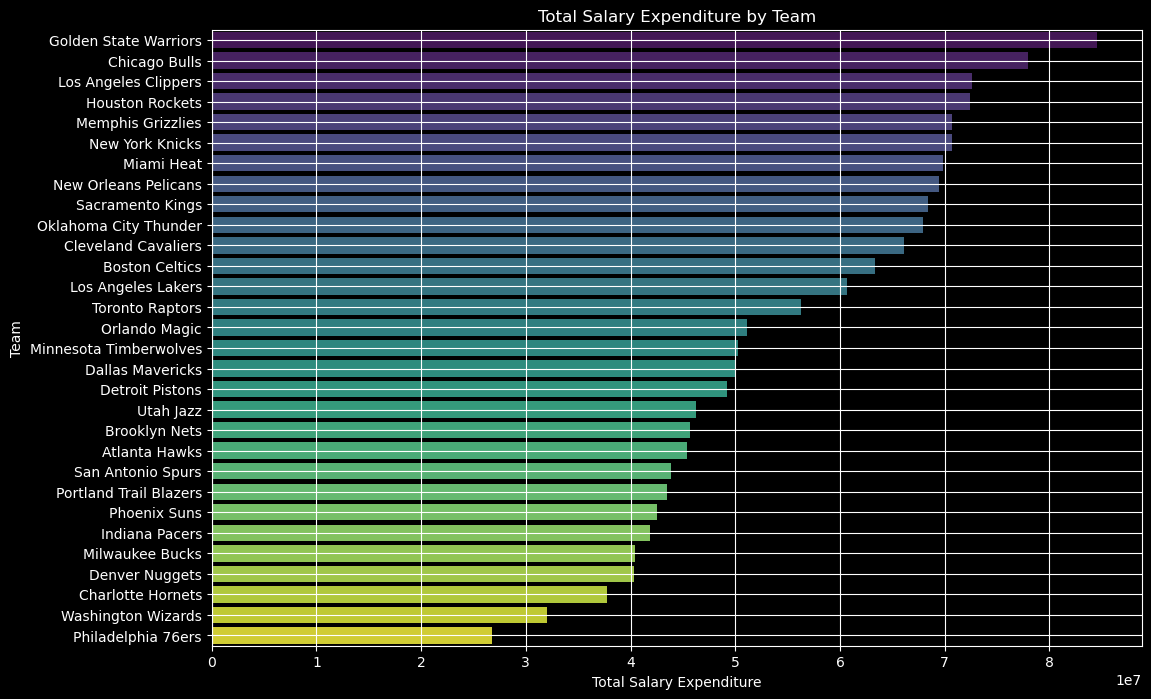

In [408]:

# Plotting the total salary expenditure for each team using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='Team', x='Total Salary Expenditure', data=total_salary_expenditure, palette='viridis', hue='Team', legend=False)
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Total Salary Expenditure')
plt.ylabel('Team')
plt.grid(True)
plt.show()

*Dispaly the entire team salary in the ascending order*

In [411]:
 #Sort the DataFrame by 'Salary' column in ascending order
sorted_df = df.sort_values(by='Salary', ascending=True)

# Print the entire sorted DataFrame
print(sorted_df.to_string())



                         Name                    Team  Number Position  Age  height  Weight                College        Salary
32     Thanasis Antetokounmpo         New York Knicks      43       SF   23     166     205               Kentucky  3.088800e+04
291           Orlando Johnson    New Orleans Pelicans       0       SG   27     158     220       UC Santa Barbara  5.572200e+04
130              Phil Pressey            Phoenix Suns      25       PG   25     153     175               Missouri  5.572200e+04
135             Alan Williams            Phoenix Suns      15        C   23     162     260       UC Santa Barbara  8.339700e+04
175              Jordan McRae     Cleveland Cavaliers      12       SG   25     169     179              Tennessee  1.111960e+05
184             Lorenzo Brown         Detroit Pistons      17       PG   25     161     189   North Carolina State  1.114440e+05
92                 Jeff Ayres    Los Angeles Clippers      19       PF   29     180     250      

*Plotting the salary distribution by Team in ascending order*

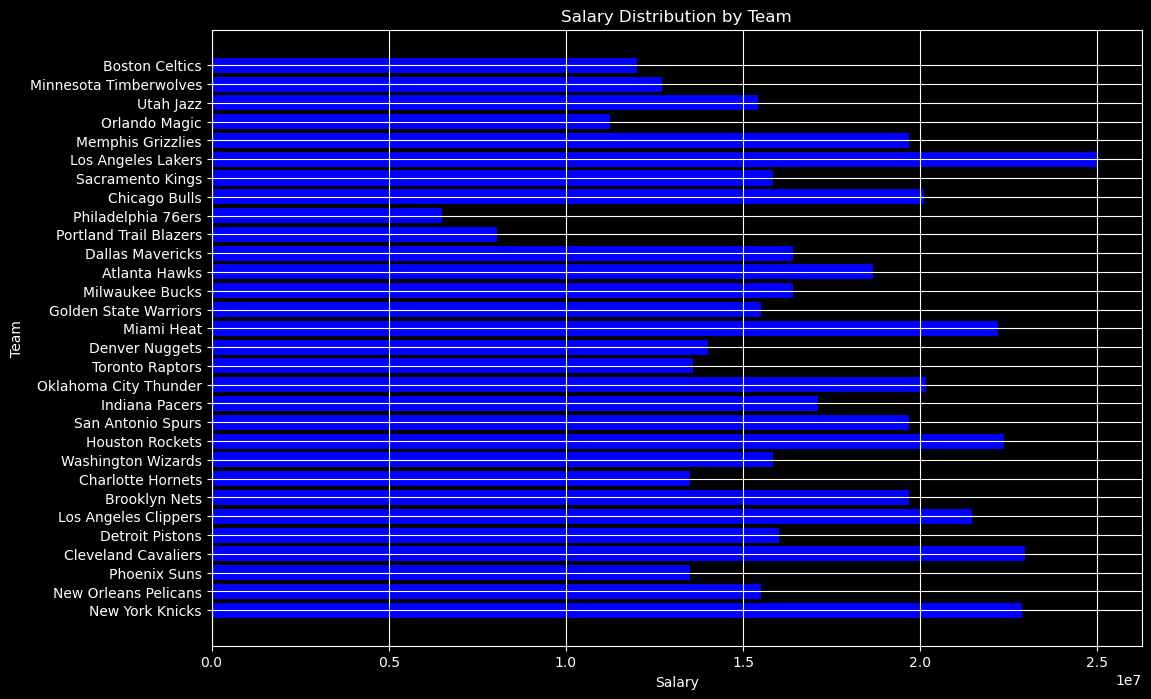

In [414]:
# Plotting the salary distribution by Team
plt.figure(figsize=(12, 8))
plt.barh( sorted_df['Team'],sorted_df['Salary'], color='blue')
plt.title('Salary Distribution by Team')
plt.xlabel('Salary')
plt.ylabel('Team')
plt.grid(True)
plt.show()

*Plotting the total salary expenditure for each team and position using barplot*

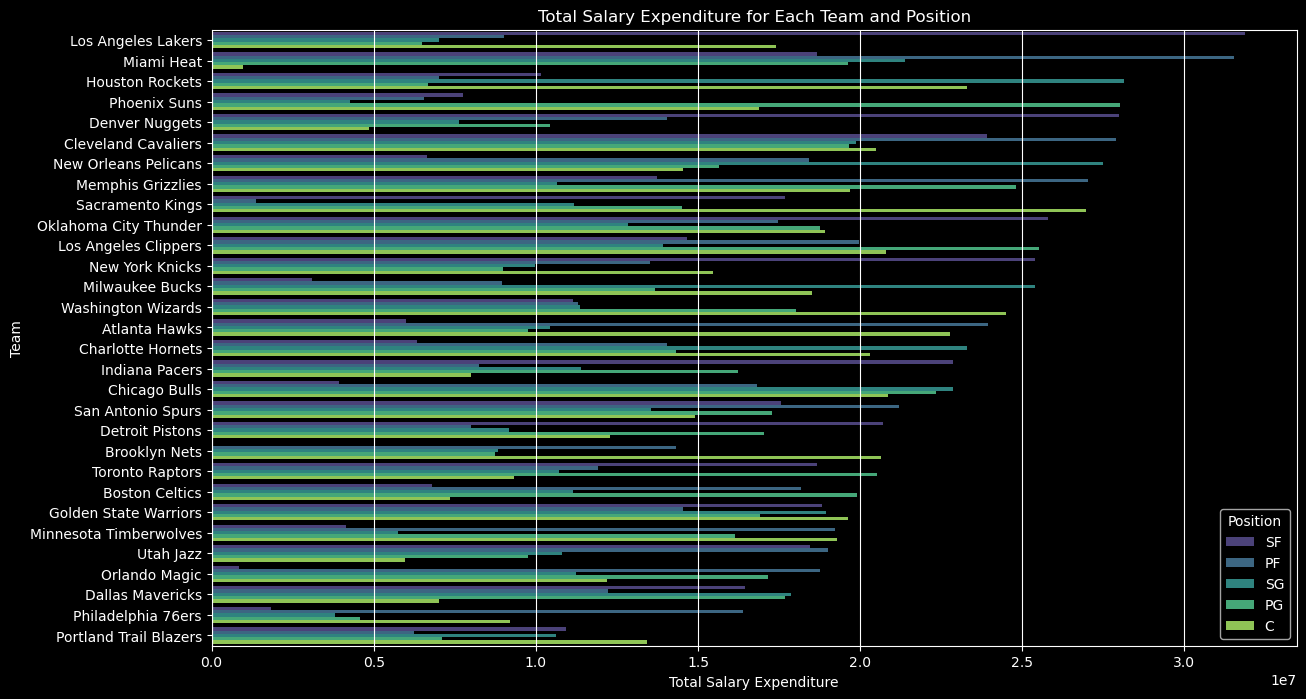

In [417]:
# Plotting the total salary expenditure for each team and position
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.barplot(x='Salary', y='Team', hue='Position', data=salary_expenditure, palette='viridis')
plt.title('Total Salary Expenditure for Each Team and Position')
plt.xlabel('Total Salary Expenditure')
plt.ylabel('Team')
plt.legend(title='Position')
plt.grid(axis='x')

plt.show()

### *Based on the salary expenditure data for the various teams and positions, here are some key insights:*  
*Insights:*  
*1.	Team with the Highest Salary Expenditure:*   

*o	Team: Los Angeles Lakers*  
*o	Position: Small Forward (SF)*  
*o	Total Salary Expenditure: \$31,866,445.0*   
*o	The Los Angeles Lakers invest heavily in the Small Forward position, suggesting that this position is crucial to their strategy and performance.*  

*2.	Top 5 Teams with the Highest Salary Expenditure:*

*o	Los Angeles Lakers (SF): \$31,866,445.0*  
*o	Miami Heat (PF): \$31,538,671.0*
*o	Houston Rockets (SG): \$28,122,883.0* 
*o	Phoenix Suns (PG): \$28,002,998.0*  
*o	Denver Nuggets (SF): \$27,982,771.0*   
*o	These teams prioritize certain positions significantly more than others, likely due to the strategic importance of these roles.*  

*3.	Position Trends:*
*o	Small Forwards (SF) and Power Forwards (PF) appear frequently among the top salary expenditures.*  
*o	Positions like Shooting Guard (SG) and Point Guard (PG) also show significant salary investments.*  
*o	This suggests that forwards and guards are highly valued across multiple teams, possibly due to their versatile roles in both offense and defense.*

*4.	Salary Distribution Patterns:*

*o	Los Angeles Lakers and Miami Heat lead the list, indicating their financial strength and willingness to invest in top talent.*  
*o	Teams like the Washington Wizards and Boston Celtics also show substantial investments in positions like Point Guard and Shooting Guard.*  
*o	Teams with lower salary expenditures for certain positions may either focus on developing younger talent or prioritize other roles.*  

*5.	Mid-Tier and Lower Salary Expenditures:*  
*o	Teams like the Minnesota Timberwolves and Denver Nuggets have a more balanced salary distribution across positions.*    
*o	Teams with the lowest salary expenditures (e.g., Orlando Magic (SF): \$845,059.0) might be focusing on rebuilding or
    have a different strategic approach.* 

       
*Detailed Insights:*  

*Highest Investment Positions:* 

*The Small Forward (SF) and Power Forward (PF) positions are highly prioritized across top teams. This reflects the strategic importance of these positions, likely due to their versatility in both offense and defense. Teams investing heavily in these positions aim to enhance their scoring, rebounding, and defensive capabilities.*

*Team Strategies:*

*Los Angeles Lakers: Their significant investment in the Small Forward position suggests that they rely heavily on the performance of their SFs to drive team success. This could mean a focus on scoring, playmaking, and versatility.*

*Miami Heat: With the highest expenditure on Power Forwards, Miami Heat may focus on strong interior play, rebounding, and defending the paint, indicating a strategy centered around dominating the key areas of the court.*

*Houston Rockets: Their top investment in the Shooting Guard position suggests a strategy focused on perimeter scoring and three-point shooting.*

*Phoenix Suns: The heavy investment in Point Guards highlights their reliance on playmaking, court vision, and offensive orchestration by their PGs.*

*Denver Nuggets: Similar to the Lakers, their investment in Small Forwards indicates a strategic emphasis on versatile wing players who can contribute on both ends of the court*

*Salary Distribution Across Teams:*

*Teams with balanced salary distributions (like the Minnesota Timberwolves and Denver Nuggets) may focus on a more holistic team approach, ensuring depth and balance across all positions. This strategy can be beneficial in maintaining team performance even with injuries or player rotations.*

*Lower salary expenditures for certain positions (e.g., Orlando Magic's low investment in SF) could indicate a rebuilding phase, development of younger talent, or a strategic focus on other positions.*

*Financial Strength and Willingness to Invest:*

*The financial might of teams like the Los Angeles Lakers and Miami Heat is evident from their top salary expenditures. Their willingness to invest in top talent showcases their ambition to compete at the highest levels and attract superstar players.*

*Teams with lower expenditures may be adopting a more cautious financial strategy, possibly aiming for sustainable growth, developing homegrown talent, or focusing on long-term financial stability.*

*Emerging Patterns and Trends:*

*A trend towards investing heavily in versatile and high-impact positions like Small Forwards (SF) and Power Forwards (PF) can be observed. This indicates that modern basketball strategies value players who can contribute in multiple aspects of the game.*

*Guards (SG and PG) also receive substantial investments, highlighting the importance of backcourt players in dictating the tempo, facilitating offense, and scoring from the perimeter.*

*These insights provide a deeper understanding of the strategies and priorities of various teams based on their salary expenditures.* 



In [420]:
# Calculate the correlation coefficient between Age and Salary
correlation_coefficient = df['Age'].corr(df['Salary'])
print(f"Correlation coefficient between Age and Salary: {correlation_coefficient}")


Correlation coefficient between Age and Salary: 0.2111695491768639


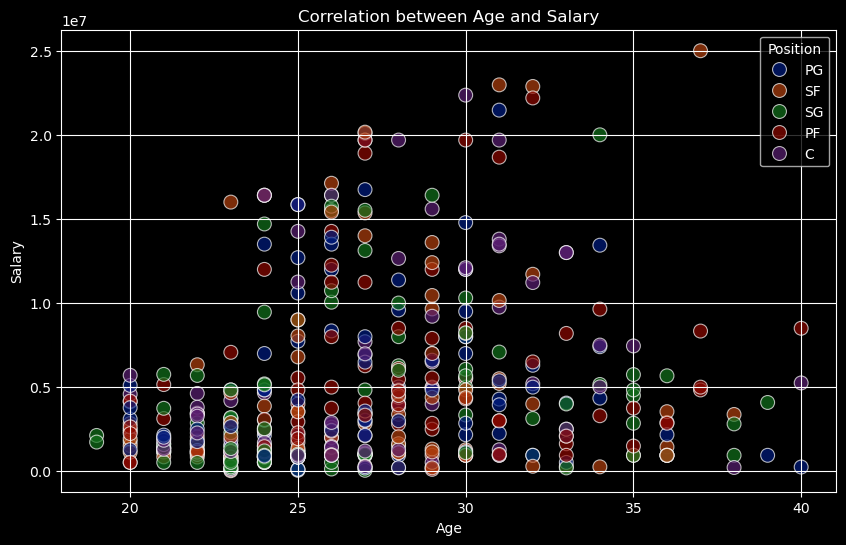

In [422]:


# Create a scatter plot with hue and larger markers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df, hue='Position', palette='dark', alpha=0.7, s=100)  # s=100 sets the marker size
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.legend(title='Position')
plt.show()

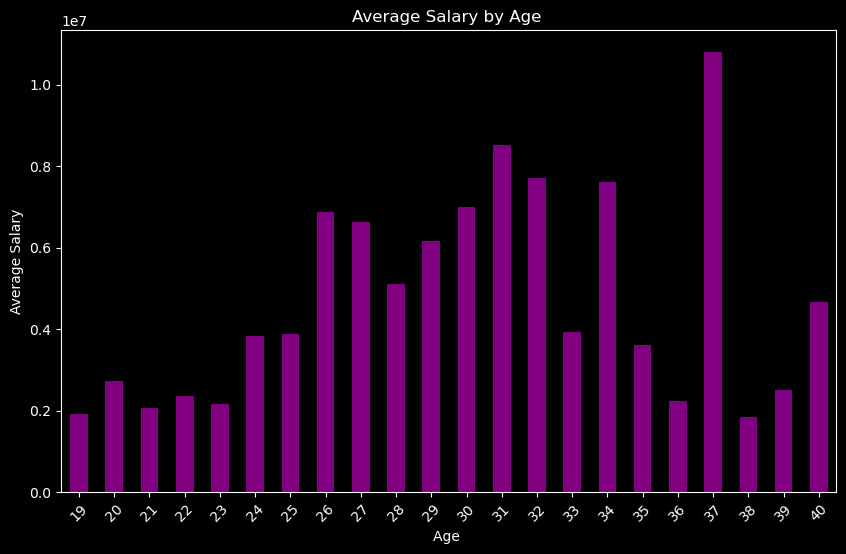

In [424]:
import matplotlib.pyplot as plt
# Calculate the average salary by age group
avg_salary_age_group = df.groupby('Age')['Salary'].mean()

# Plotting the average salary by age group
avg_salary_age_group.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Average Salary by Age ')
plt.xlabel('Age ')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


## *Correlation Coefficient: 0.214*

*Interpretation: The value of 0.214 indicates a weak positive correlation between Age and Salary. This means there is a slight tendency for Salary to increase as Age increases, but the relationship* is not very strong.

*Implications:*

*Weak Relationship: The weak correlation suggests that while there might be some relationship between Age and Salary, other factors likely have a stronger influence on Salary.*  

*Additional Variables: It's possible that other factors such as experience,  job position, or industry play a more significant role in determining Salary than Age alone.*